Loaded data with shape: (512, 512, 275)


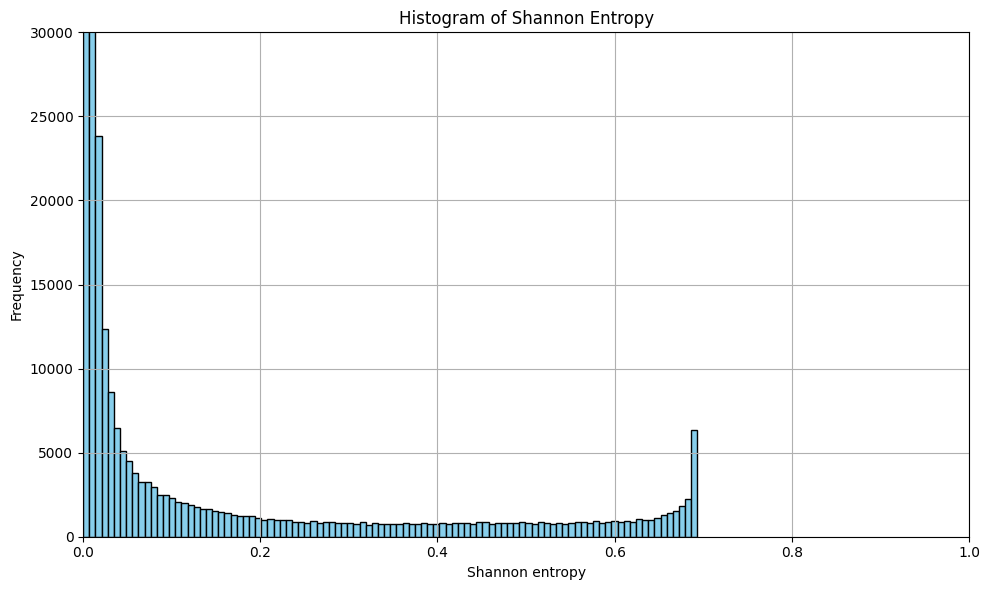

Loaded variance data with shape: (512, 512, 275)


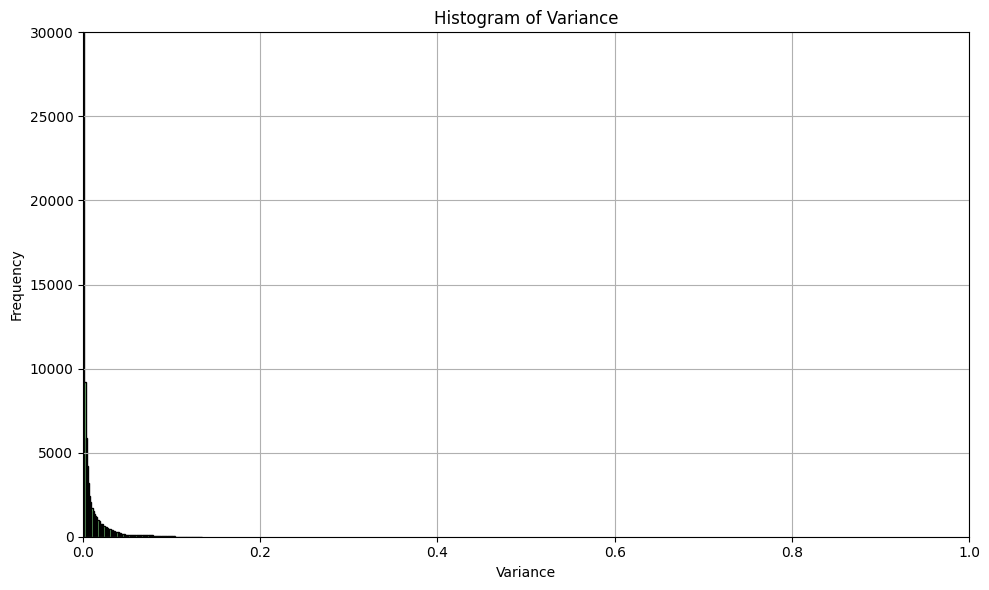

In [10]:
# Histogram of Shannon entropy values from NIfTI file
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Path to the .nii.gz file
nii_path_shannon = '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0002/case_0002_shannon_entropy.nii.gz'
nii_path_var = '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0002/case_0002_var.nii.gz'

# Check if the file exists
if not os.path.isfile(nii_path_shannon):
    raise FileNotFoundError(f"NIfTI file not found at: {nii_path_shannon}")

# Load the NIfTI file and get the data
shannon = nib.load(nii_path_shannon).get_fdata()
print(f"Loaded data with shape: {shannon.shape}")

# Flatten the data and remove NaNs or infs
shannon = shannon.flatten()
shannon = shannon[np.isfinite(shannon)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(shannon, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Shannon entropy')
plt.ylabel('Frequency')
plt.title('Histogram of Shannon Entropy')
plt.xlim(0, 1)
plt.ylim(0, 30000)
plt.grid(True)
plt.tight_layout()
plt.show()

# Load the variance NIfTI file and get the data
if not os.path.isfile(nii_path_var):
    raise FileNotFoundError(f"NIfTI file not found at: {nii_path_var}")

var = nib.load(nii_path_var).get_fdata()
print(f"Loaded variance data with shape: {var.shape}")

# Flatten the data and remove NaNs or infs
var = var.flatten()
var = var[np.isfinite(var)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(var, bins=100, color='lightgreen', edgecolor='black')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Variance')
plt.xlim(0, 1)
plt.ylim(0, 30000)
plt.grid(True)
plt.tight_layout()
plt.show()

